# Data Analysis (Classification): Cross-Validation

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge
from sklearn.ensemble  import BaggingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold

In [2]:
random = 20200910

## Load Data

In [3]:
# Upload the X and y Data
X_train = pd.read_csv('Project/Cleaned/Regression/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Regression/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Regression/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Regression/y_test.csv', na_values = ['..'])

# Drop Column
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## Cross-Validation

In [5]:
# Models to Compare
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
bagging = BaggingRegressor()
boosting = GradientBoostingRegressor()
estimators = [
    ('svr', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('elastic', ElasticNet())
]
stacking = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10, random_state=random))

In [6]:
# Cross-Validation
models= [('linear', linear),
         ('ridge', ridge), 
         ('lasso', lasso), 
         ('elastic', elastic),
        ('bagging', bagging),
        ('boosting', boosting),
        ('stacking', stacking)]

scoring = ['neg_mean_squared_error', 
           'neg_mean_absolute_error', 
           'r2']

results= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train.values.ravel(), scoring=i, cv=KFold(3, random_state=random, shuffle=True), return_train_score=True)
        results.append(scores)

In [7]:
# Model Metrics
rmse_mean_linear = np.sqrt(-results[0]['test_score'].mean())
rmse_std_linear = results[0]['test_score'].std()
mae_mean_linear = -results[1]['test_score'].mean()
mae_std_linear = results[1]['test_score'].std()
r2_mean_linear = results[2]['test_score'].mean()
r2_std_linear = results[2]['test_score'].std()

rmse_mean_ridge = np.sqrt(-results[3]['test_score'].mean())
rmse_std_ridge = results[3]['test_score'].std()
mae_mean_ridge = -results[4]['test_score'].mean()
mae_std_ridge = results[4]['test_score'].std()
r2_mean_ridge = results[5]['test_score'].mean()
r2_std_ridge = results[5]['test_score'].std()

rmse_mean_lasso = np.sqrt(-results[6]['test_score'].mean())
rmse_std_lasso = results[6]['test_score'].std()
mae_mean_lasso = -results[7]['test_score'].mean()
mae_std_lasso = results[7]['test_score'].std()
r2_mean_lasso = results[8]['test_score'].mean()
r2_std_lasso = results[8]['test_score'].std()

rmse_mean_elastic = np.sqrt(-results[9]['test_score'].mean())
rmse_std_elastic = results[9]['test_score'].std()
mae_mean_elastic = -results[10]['test_score'].mean()
mae_std_elastic = results[10]['test_score'].std()
r2_mean_elastic = results[11]['test_score'].mean()
r2_std_elastic = results[11]['test_score'].std()

rmse_mean_bagging = np.sqrt(-results[12]['test_score'].mean())
rmse_std_bagging = results[12]['test_score'].std()
mae_mean_bagging = -results[13]['test_score'].mean()
mae_std_bagging = results[13]['test_score'].std()
r2_mean_bagging = results[14]['test_score'].mean()
r2_std_bagging = results[14]['test_score'].std()

rmse_mean_boosting = np.sqrt(-results[15]['test_score'].mean())
rmse_std_boosting = results[15]['test_score'].std()
mae_mean_boosting = -results[16]['test_score'].mean()
mae_std_boosting = results[16]['test_score'].std()
r2_mean_boosting = results[17]['test_score'].mean()
r2_std_boosting = results[17]['test_score'].std()

rmse_mean_stacking = np.sqrt(-results[18]['test_score'].mean())
rmse_std_stacking = results[18]['test_score'].std()
mae_mean_stacking = -results[19]['test_score'].mean()
mae_std_stacking = results[19]['test_score'].std()
r2_mean_stacking = results[20]['test_score'].mean()
r2_std_stacking = results[20]['test_score'].std()

In [8]:
# Model Metrics
model = pd.DataFrame({
    'Model'       : ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Bagging', 'Boosting', 'Stacking'],
    'RMSE_mean'    : [rmse_mean_linear, rmse_mean_ridge, rmse_mean_lasso, rmse_mean_elastic, rmse_mean_bagging, rmse_mean_boosting, rmse_mean_stacking],
    'RMSE_std'    : [rmse_std_linear, rmse_std_ridge, rmse_std_lasso, rmse_std_elastic, rmse_std_bagging, rmse_std_boosting, rmse_std_stacking],
    'MAE_mean'   : [mae_mean_linear, mae_mean_ridge, mae_mean_lasso, mae_mean_elastic, mae_mean_bagging, mae_mean_boosting, mae_mean_stacking],
    'MAE_std'   : [mae_std_linear, mae_std_ridge, mae_std_lasso, mae_std_elastic, mae_std_bagging, mae_std_boosting, mae_std_stacking],
    'r2_mean'      : [r2_mean_linear, r2_mean_ridge, r2_mean_lasso, r2_mean_elastic, r2_mean_bagging, r2_mean_boosting, r2_mean_stacking],
    'r2_std'      : [r2_std_linear, r2_std_ridge, r2_std_lasso, r2_std_elastic, r2_std_bagging, r2_std_boosting, r2_std_stacking],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

model.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
4,Bagging,1.192603,0.094320,0.580550,0.024595,0.656962,0.029415
5,Boosting,1.389367,0.140578,0.806279,0.014242,0.545872,0.008573
1,Ridge,1.745447,0.241334,1.107626,0.035222,0.283550,0.016540
0,Linear,1.745463,0.241304,1.107686,0.035217,0.283536,0.016527
6,Stacking,1.861971,0.216399,1.042101,0.040727,0.183852,0.008585
3,ElasticNet,1.894997,0.255197,1.346369,0.025999,0.155129,0.007219
2,Lasso,2.061896,0.264982,1.544959,0.019321,-0.000799,0.000599


In [9]:
# Model Metrics
model_metrics = pd.DataFrame(model.set_index(['Model']).stack()).reset_index()
model_metrics.rename(columns={ model_metrics.columns[1]: "Metric" }, inplace = True)
model_metrics.rename(columns={ model_metrics.columns[2]: "Value" }, inplace = True)

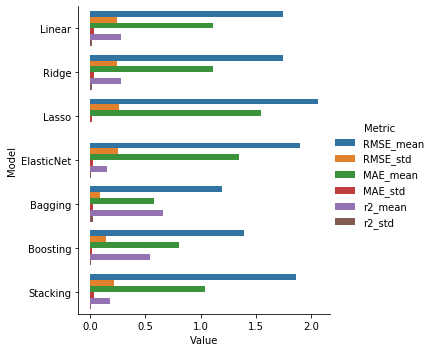

In [10]:
# Plot - RMSE Mean by Model
sns.catplot(x = 'Value', y = 'Model', data = model_metrics, hue = 'Metric', kind = 'bar', legend = 'True', orient = 'h')
plt.show()